# Projeto Dados Strava

## Pegando dados do GPX do Strava

54 - https://www.strava.com/segments/32635882 


80km - https://www.strava.com/segments/35280674
- https://www.strava.com/activities/9677971519

In [74]:
import gpxpy
import gpxpy.gpx

import pandas as pd
import numpy as np
import haversine as hs
import matplotlib.pyplot as plt
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

In [75]:
with open('La_Mision_80km.gpx', 'r', encoding='utf-8') as gpx_file:
    gpx = gpxpy.parse(gpx_file)

In [76]:
gpx

GPX(tracks=[GPXTrack(name='Lamision 🤢🥵 destruído pela montanha', segments=[GPXTrackSegment(points=[...])])])

In [77]:
gpx.get_track_points_no()

46758

In [78]:
gpx.get_elevation_extremes()

MinimumMaximum(minimum=919.7, maximum=2785.1)

- Aqui temos a altitude menor (altitude_min = 919.7) e o máximo de altitude(altitude_max = 2785.1)

In [79]:
gpx.get_uphill_downhill()

UphillDownhill(uphill=5784.3199999998415, downhill=5784.319999999906)

- Aqui temos um ganho de elevação de 5784m

In [80]:
gpx.tracks[0].segments[0].points[:10]

[GPXTrackPoint(-22.390408, -44.966808, elevation=925.0),
 GPXTrackPoint(-22.390419, -44.966804, elevation=925.0),
 GPXTrackPoint(-22.390429, -44.9668, elevation=925.0),
 GPXTrackPoint(-22.390439, -44.966796, elevation=925.0),
 GPXTrackPoint(-22.390449, -44.966792, elevation=924.9),
 GPXTrackPoint(-22.390459, -44.966788, elevation=924.9),
 GPXTrackPoint(-22.390469, -44.966784, elevation=924.9),
 GPXTrackPoint(-22.390562, -44.966751, elevation=924.8),
 GPXTrackPoint(-22.390594, -44.966742, elevation=924.7),
 GPXTrackPoint(-22.390626, -44.966732, elevation=924.7)]

In [81]:
route_info = []
for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            route_info.append({
                    'latitude': point.latitude,
                    'longitude': point.longitude,
                    'elevacao': point.elevation
            })
            
route_df = pd.DataFrame(route_info)
route_df.head(10)

latitude  longitude  elevacao
0 -22.390408 -44.966808     925.0
1 -22.390419 -44.966804     925.0
2 -22.390429 -44.966800     925.0
3 -22.390439 -44.966796     925.0
4 -22.390449 -44.966792     924.9
5 -22.390459 -44.966788     924.9
6 -22.390469 -44.966784     924.9
7 -22.390562 -44.966751     924.8
8 -22.390594 -44.966742     924.7
9 -22.390626 -44.966732     924.7

- Aqui podemos ver que em nossos dados temos um mesmo lat/long com diferentes 'elevações'. Então vamos agrupar e remover essas linhas

### Removendo linhas e lat/longs duplicados

In [82]:
df = route_df
df['ordem'] = range(len(df))

# Agrupando pela latitude e longitude e calculando a média da elevação
#media_elevacao = df.groupby(['latitude', 'longitude'])['elevacao'].mean().reset_index()

# Mesclando os resultados com base na coluna 'ordem' para manter a ordem original das linhas
#resultado_final = pd.merge(df[['latitude', 'longitude', 'ordem']], media_elevacao, on=['latitude', 'longitude'], how='left').drop_duplicates().sort_values('ordem').drop(columns='ordem')

#df_final = resultado_final.drop_duplicates()
df_final = df
df_final.head()

latitude  longitude  elevacao  ordem
0 -22.390408 -44.966808     925.0      0
1 -22.390419 -44.966804     925.0      1
2 -22.390429 -44.966800     925.0      2
3 -22.390439 -44.966796     925.0      3
4 -22.390449 -44.966792     924.9      4

In [83]:
df_final.describe()

latitude     longitude      elevacao        ordem
count  46758.000000  46758.000000  46758.000000  46758.00000
mean     -22.404163    -44.865597   1908.989529  23378.50000
std        0.026347      0.051949    502.688809  13498.01628
min      -22.454760    -44.966808    919.700000      0.00000
25%      -22.427847    -44.908198   1477.925000  11689.25000
50%      -22.405184    -44.870801   1919.300000  23378.50000
75%      -22.380779    -44.812078   2442.175000  35067.75000
max      -22.352708    -44.782237   2785.100000  46757.00000

### Visualização

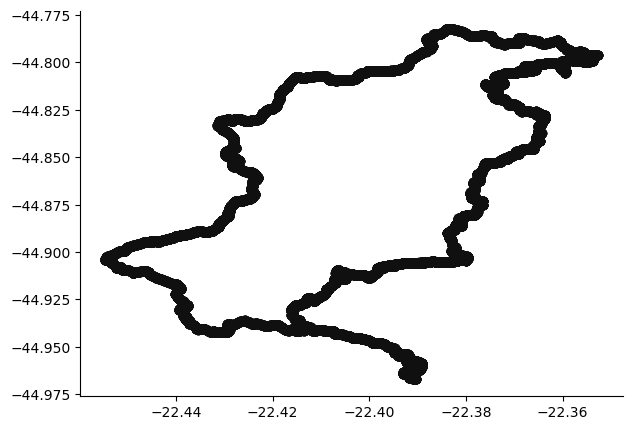

In [84]:
plt.figure(figsize=(7,5))
plt.scatter(df_final['latitude'], df_final['longitude'], color = '#101010')

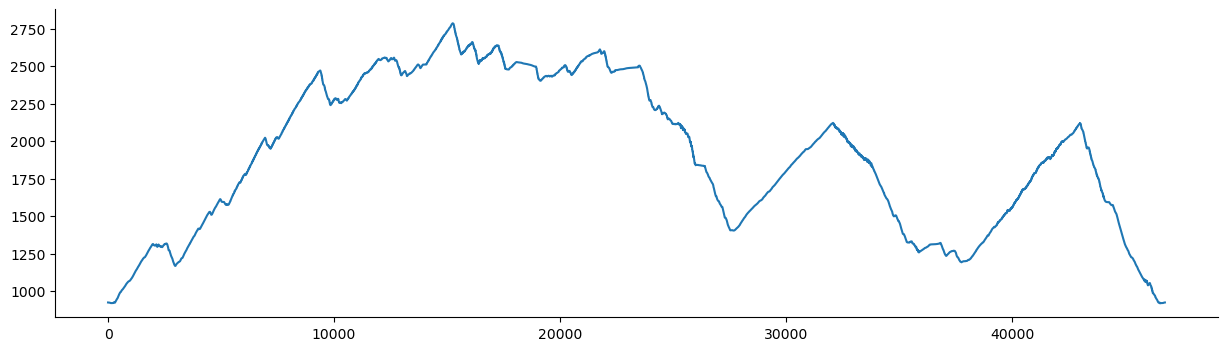

In [85]:
plt.figure(figsize=(15,4))
plt.plot(df_final.index, df_final['elevacao'])

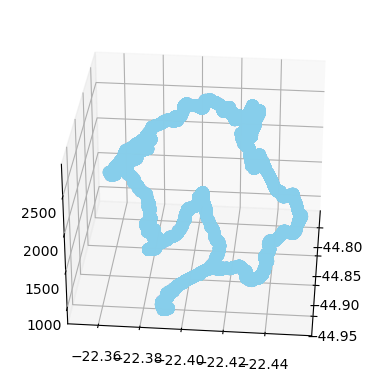

In [86]:
# libraries
from mpl_toolkits.mplot3d import Axes3D


# Dataset
# plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_final['longitude'],df_final['latitude'],  df_final['elevacao'], c='skyblue', s=60)
ax.view_init(30, 185)
plt.show()

In [87]:
import plotly.graph_objects  as  go 

z=df_final['elevacao']
intensity = (z - z.min()) / (z.max() - z.min())

fig = go.Figure(data=[go.Mesh3d(x=df_final['longitude'],
                                y=df_final['latitude'],
                                z=df_final['elevacao'],
                                intensity=intensity,
                                colorbar_title='Elevação',
                                colorscale='Viridis',  # Você pode escolher qualquer escala de cores
                                showscale=True
                                ),
                                go.Scatter3d(
                                    x=df_final['longitude'],
                                    y=df_final['latitude'],
                                    z=df_final['elevacao'],
                                    mode='lines',
                                    line=dict(color='black', width=4),  # Configurações da linha preta
                                    showlegend=False
                                )
])

fig.update_layout(scene=dict(zaxis=dict(range=[z.min(), z.max()])),
                  margin=dict(l=0, r=0, b=0, t=0))
fig.show()

### Análises

Calculando a Diferença de elevação entre os Pontos

In [88]:
df_final['diff_elev'] = df_final['elevacao'].diff()
df_final.head()

latitude  longitude  elevacao  ordem  diff_elev
0 -22.390408 -44.966808     925.0      0        NaN
1 -22.390419 -44.966804     925.0      1        0.0
2 -22.390429 -44.966800     925.0      2        0.0
3 -22.390439 -44.966796     925.0      3        0.0
4 -22.390449 -44.966792     924.9      4       -0.1

Calculando as distancias entre um ponto e outro

In [89]:
def calc_dist(lat1, long1, lat2, long2) -> float:
    distancia = hs.haversine(
        point1 = (lat1, long1),
        point2 = (lat2, long2),
        unit = hs.Unit.METERS
    )
    return np.round(distancia, 2)

In [90]:
distancia = [np.nan]


for i in range(len(df_final)):
    if i == 0:
        continue
    else:
        distancia.append(calc_dist(
            lat1  = df_final.iloc[i-1]['latitude'],
            long1 = df_final.iloc[i-1]['longitude'],
            lat2  = df_final.iloc[i]['latitude'],
            long2 = df_final.iloc[i]['longitude'],
        ))
    
df_final['distancias'] = distancia


In [91]:
df_final.head(10)

latitude  longitude  elevacao  ordem  diff_elev  distancias
0 -22.390408 -44.966808     925.0      0        NaN         NaN
1 -22.390419 -44.966804     925.0      1        0.0        1.29
2 -22.390429 -44.966800     925.0      2        0.0        1.19
3 -22.390439 -44.966796     925.0      3        0.0        1.19
4 -22.390449 -44.966792     924.9      4       -0.1        1.19
5 -22.390459 -44.966788     924.9      5        0.0        1.19
6 -22.390469 -44.966784     924.9      6        0.0        1.19
7 -22.390562 -44.966751     924.8      7       -0.1       10.88
8 -22.390594 -44.966742     924.7      8       -0.1        3.68
9 -22.390626 -44.966732     924.7      9        0.0        3.70

In [92]:
df_final.describe()

latitude     longitude      elevacao        ordem     diff_elev  \
count  46758.000000  46758.000000  46758.000000  46758.00000  46757.000000   
mean     -22.404163    -44.865597   1908.989529  23378.50000      0.000000   
std        0.026347      0.051949    502.688809  13498.01628      0.489911   
min      -22.454760    -44.966808    919.700000      0.00000     -6.300000   
25%      -22.427847    -44.908198   1477.925000  11689.25000      0.000000   
50%      -22.405184    -44.870801   1919.300000  23378.50000      0.000000   
75%      -22.380779    -44.812078   2442.175000  35067.75000      0.100000   
max      -22.352708    -44.782237   2785.100000  46757.00000      5.200000   

         distancias  
count  46757.000000  
mean       1.744253  
std        1.628474  
min        0.000000  
25%        0.000000  
50%        2.160000  
75%        2.910000  
max       15.630000

In [93]:
df_final['distancias'].sum()

81556.02

- Podemos obter que nosso trajeto tem um total de 81,55km

In [94]:
df_final['soma_elev'] = df_final['diff_elev'].cumsum()
df_final['soma_dist'] = df_final['distancias'].cumsum()
df_final = df_final.fillna(0)
df_final.head()


latitude  longitude  elevacao  ordem  diff_elev  distancias  soma_elev  \
0 -22.390408 -44.966808     925.0      0        0.0        0.00        0.0   
1 -22.390419 -44.966804     925.0      1        0.0        1.29        0.0   
2 -22.390429 -44.966800     925.0      2        0.0        1.19        0.0   
3 -22.390439 -44.966796     925.0      3        0.0        1.19        0.0   
4 -22.390449 -44.966792     924.9      4       -0.1        1.19       -0.1   

   soma_dist  
0       0.00  
1       1.29  
2       2.48  
3       3.67  
4       4.86

In [95]:
df_final = df_final.reset_index(drop=True)

In [96]:
df_final.describe()

latitude     longitude      elevacao        ordem     diff_elev  \
count  46758.000000  46758.000000  46758.000000  46758.00000  46758.000000   
mean     -22.404163    -44.865597   1908.989529  23378.50000      0.000000   
std        0.026347      0.051949    502.688809  13498.01628      0.489906   
min      -22.454760    -44.966808    919.700000      0.00000     -6.300000   
25%      -22.427847    -44.908198   1477.925000  11689.25000      0.000000   
50%      -22.405184    -44.870801   1919.300000  23378.50000      0.000000   
75%      -22.380779    -44.812078   2442.175000  35067.75000      0.100000   
max      -22.352708    -44.782237   2785.100000  46757.00000      5.200000   

         distancias     soma_elev     soma_dist  
count  46758.000000  46758.000000  46758.000000  
mean       1.744215    983.989529  39747.462433  
std        1.628477    502.688809  21851.243612  
min        0.000000     -5.300000      0.000000  
25%        0.000000    552.925000  21620.890000  
50%        2.160000    994.300000  34877.660000  
75%        2.910000   1517.175000  60468.532500  
max       15.630000   1860.100000  81556.020000

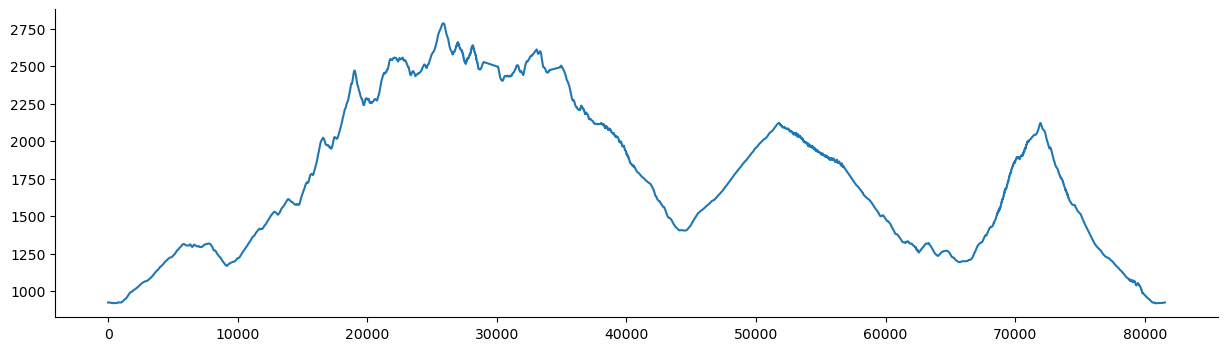

In [97]:
plt.figure(figsize=(15,4))
plt.plot(df_final['soma_dist'], df_final['elevacao'])

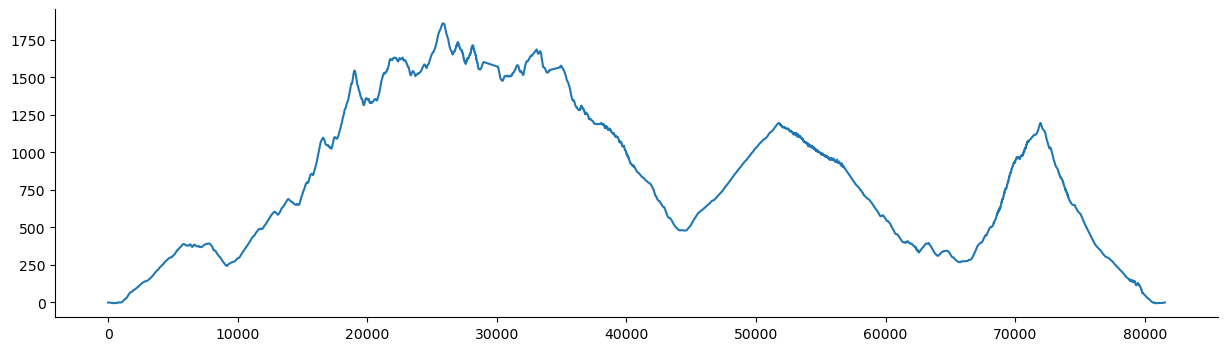

In [98]:
plt.figure(figsize=(15,4))
plt.plot(df_final['soma_dist'], df_final['soma_elev'])

In [99]:
df_final.head()

latitude  longitude  elevacao  ordem  diff_elev  distancias  soma_elev  \
0 -22.390408 -44.966808     925.0      0        0.0        0.00        0.0   
1 -22.390419 -44.966804     925.0      1        0.0        1.29        0.0   
2 -22.390429 -44.966800     925.0      2        0.0        1.19        0.0   
3 -22.390439 -44.966796     925.0      3        0.0        1.19        0.0   
4 -22.390449 -44.966792     924.9      4       -0.1        1.19       -0.1   

   soma_dist  
0       0.00  
1       1.29  
2       2.48  
3       3.67  
4       4.86

In [100]:
import math
df_final['km_group'] = df_final['soma_dist'].apply(lambda x: math.ceil(x / 1000))
df_final.head(20)

latitude  longitude  elevacao  ordem  diff_elev  distancias  soma_elev  \
0  -22.390408 -44.966808     925.0      0        0.0        0.00        0.0   
1  -22.390419 -44.966804     925.0      1        0.0        1.29        0.0   
2  -22.390429 -44.966800     925.0      2        0.0        1.19        0.0   
3  -22.390439 -44.966796     925.0      3        0.0        1.19        0.0   
4  -22.390449 -44.966792     924.9      4       -0.1        1.19       -0.1   
5  -22.390459 -44.966788     924.9      5        0.0        1.19       -0.1   
6  -22.390469 -44.966784     924.9      6        0.0        1.19       -0.1   
7  -22.390562 -44.966751     924.8      7       -0.1       10.88       -0.2   
8  -22.390594 -44.966742     924.7      8       -0.1        3.68       -0.3   
9  -22.390626 -44.966732     924.7      9        0.0        3.70       -0.3   
10 -22.390659 -44.966728     924.7     10        0.0        3.69       -0.3   
11 -22.390690 -44.966725     924.6     11       -0.1        3.46       -0.4   
12 -22.390721 -44.966721     924.6     12        0.0        3.47       -0.4   
13 -22.390756 -44.966718     924.6     13        0.0        3.90       -0.4   
14 -22.390819 -44.966716     924.6     14        0.0        7.01       -0.4   
15 -22.390819 -44.966716     924.6     15        0.0        0.00       -0.4   
16 -22.390848 -44.966713     924.6     16        0.0        3.24       -0.4   
17 -22.390881 -44.966710     924.6     17        0.0        3.68       -0.4   
18 -22.390911 -44.966703     924.5     18       -0.1        3.41       -0.5   
19 -22.390937 -44.966700     924.5     19        0.0        2.91       -0.5   

    soma_dist  km_group  
0        0.00         0  
1        1.29         1  
2        2.48         1  
3        3.67         1  
4        4.86         1  
5        6.05         1  
6        7.24         1  
7       18.12         1  
8       21.80         1  
9       25.50         1  
10      29.19         1  
11      32.65         1  
12      36.12         1  
13      40.02         1  
14      47.03         1  
15      47.03         1  
16      50.27         1  
17      53.95         1  
18      57.36         1  
19      60.27         1

In [101]:
df_final = df_final[df_final['km_group'] != 0]

In [102]:
# Calcular desnivel_positivo e desnivel_negativo
df_final['desnivel_positivo'] = df_final['diff_elev'].apply(lambda x: x if x > 0 else 0)
df_final['desnivel_negativo'] = df_final['diff_elev'].apply(lambda x: x if x < 0 else 0)


In [103]:
df_final.head(10)

latitude  longitude  elevacao  ordem  diff_elev  distancias  soma_elev  \
1  -22.390419 -44.966804     925.0      1        0.0        1.29        0.0   
2  -22.390429 -44.966800     925.0      2        0.0        1.19        0.0   
3  -22.390439 -44.966796     925.0      3        0.0        1.19        0.0   
4  -22.390449 -44.966792     924.9      4       -0.1        1.19       -0.1   
5  -22.390459 -44.966788     924.9      5        0.0        1.19       -0.1   
6  -22.390469 -44.966784     924.9      6        0.0        1.19       -0.1   
7  -22.390562 -44.966751     924.8      7       -0.1       10.88       -0.2   
8  -22.390594 -44.966742     924.7      8       -0.1        3.68       -0.3   
9  -22.390626 -44.966732     924.7      9        0.0        3.70       -0.3   
10 -22.390659 -44.966728     924.7     10        0.0        3.69       -0.3   

    soma_dist  km_group  desnivel_positivo  desnivel_negativo  
1        1.29         1                0.0                0.0  
2        2.48         1                0.0                0.0  
3        3.67         1                0.0                0.0  
4        4.86         1                0.0               -0.1  
5        6.05         1                0.0                0.0  
6        7.24         1                0.0                0.0  
7       18.12         1                0.0               -0.1  
8       21.80         1                0.0               -0.1  
9       25.50         1                0.0                0.0  
10      29.19         1                0.0                0.0

In [104]:
df_final['desnivel_positivo'].sum()

6089.199999999998

In [105]:
# Agrupar por 'km_group' e somar 'desnivel_positivo'
grouped_df = df_final.groupby('km_group')['desnivel_positivo'].sum().reset_index()
grouped_df

km_group  desnivel_positivo
0          1                6.2
1          2               85.0
2          3               59.9
3          4               90.4
4          5               75.4
..       ...                ...
77        78                0.0
78        79               15.2
79        80               38.7
80        81                2.2
81        82                4.8

[82 rows x 2 columns]

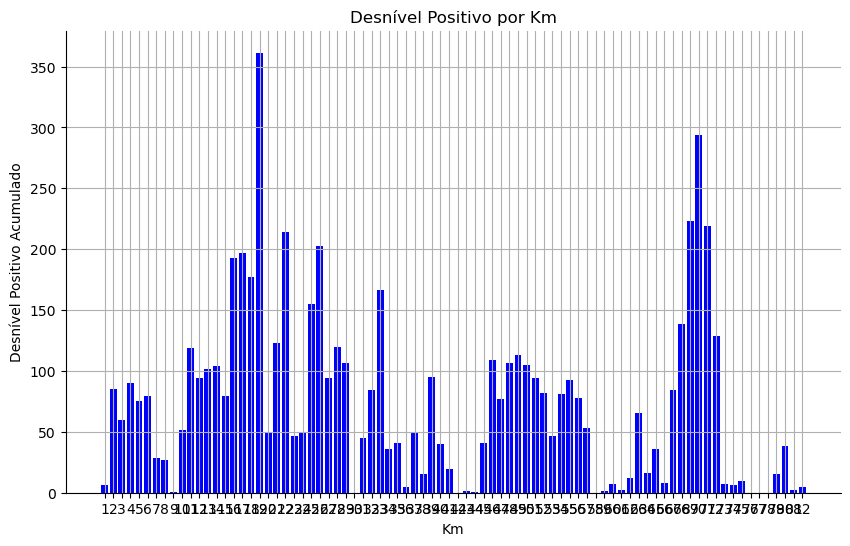

In [106]:
# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.bar(grouped_df['km_group'], grouped_df['desnivel_positivo'], color='b')
plt.xlabel('Km')
plt.ylabel('Desnível Positivo Acumulado')
plt.title('Desnível Positivo por Km')
plt.xticks(grouped_df['km_group'])
plt.grid(True)
plt.show()

In [107]:
# Calcular o 'desnivel_positivo' acumulado
grouped_df['desnivel_positivo_acumulado'] = grouped_df['desnivel_positivo'].cumsum()
grouped_df

km_group  desnivel_positivo  desnivel_positivo_acumulado
0          1                6.2                          6.2
1          2               85.0                         91.2
2          3               59.9                        151.1
3          4               90.4                        241.5
4          5               75.4                        316.9
..       ...                ...                          ...
77        78                0.0                       6028.3
78        79               15.2                       6043.5
79        80               38.7                       6082.2
80        81                2.2                       6084.4
81        82                4.8                       6089.2

[82 rows x 3 columns]

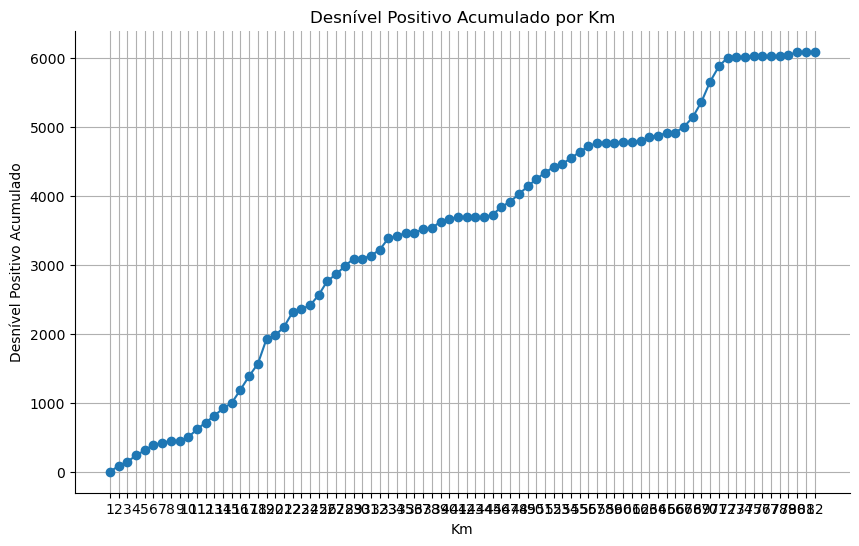

In [108]:
# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(grouped_df['km_group'], grouped_df['desnivel_positivo_acumulado'], marker='o', linestyle='-')
plt.xlabel('Km')
plt.ylabel('Desnível Positivo Acumulado')
plt.title('Desnível Positivo Acumulado por Km')
plt.xticks(grouped_df['km_group'])
plt.grid(True)
plt.show()

In [109]:
df_final['desnivel_negativo'].sum()

-6089.199999999997

## Agrupando a cada 5km e a cada 2km

In [110]:
df_final['2km_group'] = df_final['soma_dist'].apply(lambda x: math.ceil(x / 2000))
df_final['5km_group'] = df_final['soma_dist'].apply(lambda x: math.ceil(x / 5000))
df_final.head(5)

latitude  longitude  elevacao  ordem  diff_elev  distancias  soma_elev  \
1 -22.390419 -44.966804     925.0      1        0.0        1.29        0.0   
2 -22.390429 -44.966800     925.0      2        0.0        1.19        0.0   
3 -22.390439 -44.966796     925.0      3        0.0        1.19        0.0   
4 -22.390449 -44.966792     924.9      4       -0.1        1.19       -0.1   
5 -22.390459 -44.966788     924.9      5        0.0        1.19       -0.1   

   soma_dist  km_group  desnivel_positivo  desnivel_negativo  2km_group  \
1       1.29         1                0.0                0.0          1   
2       2.48         1                0.0                0.0          1   
3       3.67         1                0.0                0.0          1   
4       4.86         1                0.0               -0.1          1   
5       6.05         1                0.0                0.0          1   

   5km_group  
1          1  
2          1  
3          1  
4          1  
5          1

In [111]:
# Função para criar o novo campo
def create_distance_label(group):
    start_km = (group - 1) * 2
    end_km = start_km + 2
    return f'de {start_km} até {end_km}km'
    
    

# Aplicando a função para criar o novo campo 'distance_label'
df_final['classe_2km'] = df_final['2km_group'].apply(create_distance_label)

In [112]:
# Agrupar por 'km_group' e somar 'desnivel_positivo'
grouped2_df = df_final.groupby('classe_2km', sort=False)['desnivel_positivo'].sum().reset_index()
grouped2_df

classe_2km  desnivel_positivo
0     de 0 até 2km               91.2
1     de 2 até 4km              150.3
2     de 4 até 6km              155.1
3     de 6 até 8km               55.6
4    de 8 até 10km               51.7
5   de 10 até 12km              213.4
6   de 12 até 14km              205.9
7   de 14 até 16km              271.8
8   de 16 até 18km              374.4
9   de 18 até 20km              411.1
10  de 20 até 22km              336.9
11  de 22 até 24km               96.4
12  de 24 até 26km              357.5
13  de 26 até 28km              213.5
14  de 28 até 30km              106.2
15  de 30 até 32km              129.1
16  de 32 até 34km              202.4
17  de 34 até 36km               45.4
18  de 36 até 38km               65.6
19  de 38 até 40km              135.3
20  de 40 até 42km               19.7
21  de 42 até 44km                1.9
22  de 44 até 46km              150.3
23  de 46 até 48km              183.6
24  de 48 até 50km              218.5
25  de 50 até 52km              176.1
26  de 52 até 54km              128.0
27  de 54 até 56km              170.6
28  de 56 até 58km               52.8
29  de 58 até 60km                8.4
30  de 60 até 62km               13.9
31  de 62 até 64km               82.1
32  de 64 até 66km               43.9
33  de 66 até 68km              222.6
34  de 68 até 70km              516.3
35  de 70 até 72km              347.4
36  de 72 até 74km               13.6
37  de 74 até 76km                9.8
38  de 76 até 78km                0.0
39  de 78 até 80km               53.9
40  de 80 até 82km                7.0

In [113]:
# Agrupar por 'km_group' e somar 'desnivel_positivo'
grouped2_df = df_final.groupby('2km_group')['desnivel_positivo'].sum().reset_index()
grouped2_df

2km_group  desnivel_positivo
0           1               91.2
1           2              150.3
2           3              155.1
3           4               55.6
4           5               51.7
5           6              213.4
6           7              205.9
7           8              271.8
8           9              374.4
9          10              411.1
10         11              336.9
11         12               96.4
12         13              357.5
13         14              213.5
14         15              106.2
15         16              129.1
16         17              202.4
17         18               45.4
18         19               65.6
19         20              135.3
20         21               19.7
21         22                1.9
22         23              150.3
23         24              183.6
24         25              218.5
25         26              176.1
26         27              128.0
27         28              170.6
28         29               52.8
29         30                8.4
30         31               13.9
31         32               82.1
32         33               43.9
33         34              222.6
34         35              516.3
35         36              347.4
36         37               13.6
37         38                9.8
38         39                0.0
39         40               53.9
40         41                7.0

In [114]:
def create_distance_label_5km(group):
    start_km = (group - 1) * 5
    end_km = start_km + 5
    return f'de {start_km} até {end_km}km'

# Aplicando a função para criar o novo campo 'distance_label_5km'
df_final['classe_5km'] = df_final['5km_group'].apply(create_distance_label_5km)


In [115]:
# Agrupar por 'km_group' e somar 'desnivel_positivo'
grouped5_df = df_final.groupby('classe_5km', sort=False )['desnivel_positivo'].sum().reset_index()
grouped5_df

classe_5km  desnivel_positivo
0     de 0 até 5km              316.9
1    de 5 até 10km              187.0
2   de 10 até 15km              498.4
3   de 15 até 20km              978.2
4   de 20 até 25km              587.9
5   de 25 até 30km              522.6
6   de 30 até 35km              372.2
7   de 35 até 40km              205.6
8   de 40 até 45km               62.8
9   de 45 até 50km              511.2
10  de 50 até 55km              396.8
11  de 55 até 60km              139.1
12  de 60 até 65km              131.9
13  de 65 até 70km              746.9
14  de 70 até 75km              370.8
15  de 75 até 80km               53.9
16  de 80 até 85km                7.0

In [116]:
# Agrupar por 'km_group' e somar 'desnivel_positivo'
grouped5_df = df_final.groupby('5km_group')['desnivel_positivo'].sum().reset_index()
grouped5_df

5km_group  desnivel_positivo
0           1              316.9
1           2              187.0
2           3              498.4
3           4              978.2
4           5              587.9
5           6              522.6
6           7              372.2
7           8              205.6
8           9               62.8
9          10              511.2
10         11              396.8
11         12              139.1
12         13              131.9
13         14              746.9
14         15              370.8
15         16               53.9
16         17                7.0

In [117]:
82/2

41.0

In [118]:
df_final.head()

latitude  longitude  elevacao  ordem  diff_elev  distancias  soma_elev  \
1 -22.390419 -44.966804     925.0      1        0.0        1.29        0.0   
2 -22.390429 -44.966800     925.0      2        0.0        1.19        0.0   
3 -22.390439 -44.966796     925.0      3        0.0        1.19        0.0   
4 -22.390449 -44.966792     924.9      4       -0.1        1.19       -0.1   
5 -22.390459 -44.966788     924.9      5        0.0        1.19       -0.1   

   soma_dist  km_group  desnivel_positivo  desnivel_negativo  2km_group  \
1       1.29         1                0.0                0.0          1   
2       2.48         1                0.0                0.0          1   
3       3.67         1                0.0                0.0          1   
4       4.86         1                0.0               -0.1          1   
5       6.05         1                0.0                0.0          1   

   5km_group    classe_2km    classe_5km  
1          1  de 0 até 2km  de 0 até 5km  
2          1  de 0 até 2km  de 0 até 5km  
3          1  de 0 até 2km  de 0 até 5km  
4          1  de 0 até 2km  de 0 até 5km  
5          1  de 0 até 2km  de 0 até 5km

In [119]:
df_final.to_csv("tabela_final_lsmision_80km.csv", sep = ';')